# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset


In [4]:
df = pd.read_csv('Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [5]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


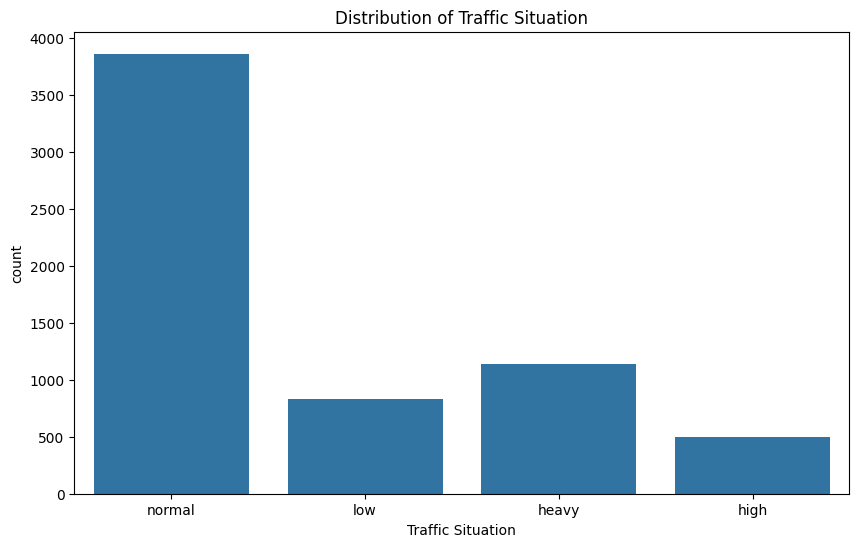

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.show()

In [48]:
df_encoded = pd.get_dummies(df)
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                       Time  Day of the week  CarCount  BikeCount  BusCount  \
Time               1.000000        -0.003315  0.494905   0.295833  0.350467   
Day of the week   -0.003315         1.000000  0.013478  -0.087412  0.115630   
CarCount           0.494905         0.013478  1.000000   0.705941  0.664491   
BikeCount          0.295833        -0.087412  0.705941   1.000000  0.581289   
BusCount           0.350467         0.115630  0.664491   0.581289  1.000000   
TruckCount        -0.302568         0.022574 -0.583984  -0.585670 -0.533847   
Total              0.472014         0.022747  0.971386   0.779261  0.763496   
Traffic Situation -0.289184         0.024173 -0.686521  -0.575332 -0.614372   

                   TruckCount     Total  Traffic Situation  
Time                -0.302568  0.472014          -0.289184  
Day of the week      0.022574  0.022747           0.024173  
CarCount            -0.583984  0.971386          -0.686521  
BikeCount           -0.585670  0.779261     

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [14]:
print(df.isnull().sum())

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [17]:
label_encoder = LabelEncoder()

df['Time']= label_encoder.fit_transform(df['Time'])
df['Day of the week']= label_encoder.fit_transform(df['Day of the week'])
df['Traffic Situation']= label_encoder.fit_transform(df['Traffic Situation'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time               6324 non-null   int64
 1   Date               6324 non-null   int64
 2   Day of the week    6324 non-null   int64
 3   CarCount           6324 non-null   int64
 4   BikeCount          6324 non-null   int64
 5   BusCount           6324 non-null   int64
 6   TruckCount         6324 non-null   int64
 7   Total              6324 non-null   int64
 8   Traffic Situation  6324 non-null   int64
dtypes: int64(9)
memory usage: 444.8 KB


In [ ]:
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
scaler = StandardScaler()
df_encodeed[numerical_features] = scaler.fit_transform(df_encodeed[numerical_features])

In [20]:
numerical_columns = ['Time', 'Day of the week', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("DataFrame after standardization:")
df.head()

DataFrame after standardization:


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,-1.137300,10,0.906058,13,-0.881214,-0.857050,0.498124,-1.192287,3
1,-1.065529,10,0.906058,14,-0.969218,-0.938226,1.617112,-0.995318,3
2,-0.993758,10,0.906058,10,-0.881214,-0.857050,1.244116,-1.102756,3
3,-0.921987,10,0.906058,10,-0.881214,-0.857050,1.617112,-1.031131,3
4,-0.850216,10,0.906058,11,-0.881214,-0.938226,1.430614,-1.066943,3


In [22]:
df = df.drop('Date', axis=1)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

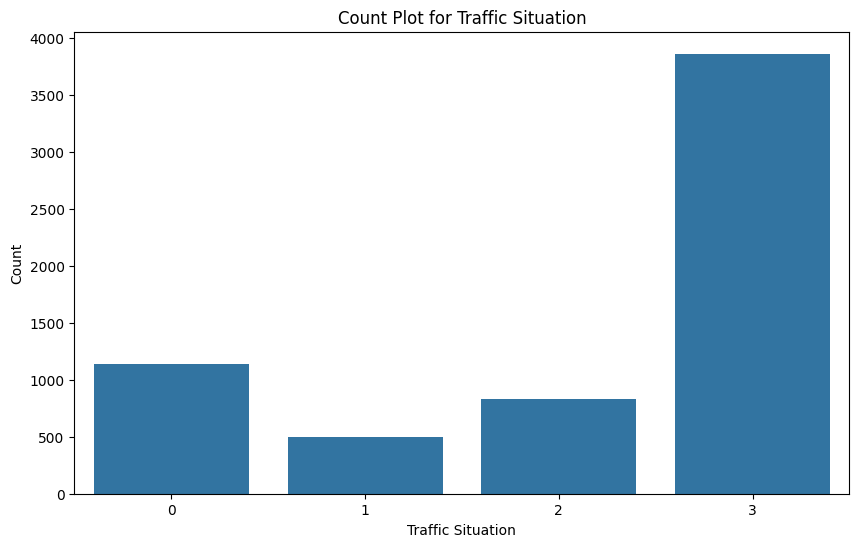

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Count Plot for Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


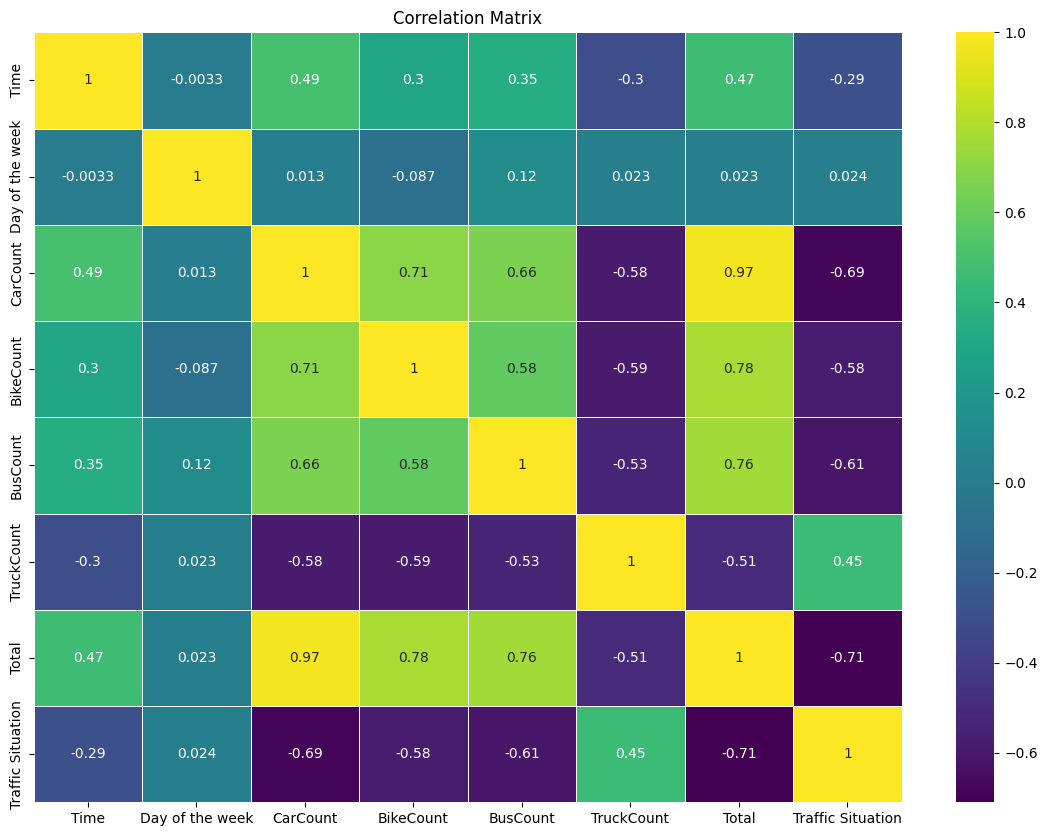

In [25]:
df_encoded = pd.get_dummies(df)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [26]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

In [28]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [35]:
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Evaluate the model performance

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Bagging Classifier Accuracy: {accuracy}')

Bagging Classifier Accuracy: 0.9201581027667984


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [38]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

### Evaluate the model performance

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Classifier Accuracy: {accuracy}')

Gradient Boosting Classifier Accuracy: 0.9201581027667984


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [41]:
base_models = [
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

### Define meta-learner (LogisticRegression)

In [42]:
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [44]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_classifier.fit(X_train, y_train)
y_pred_stack = stacking_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

### Evaluate the model performance

In [45]:
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {accuracy_stack}")

Stacking Classifier Accuracy: 0.9541501976284585


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Frist the Important Features for Predicting Traffic Situation
1- CarCount: The number of cars is a direct indicator of traffic congestion

2- BikeCount: The number of bikes can influence the overall traffic situation, especially in areas with high bike usage.

3- BusCount: Buses can significantly impact traffic flow due to their size and frequent stops.

4- TruckCount: Trucks, similar to buses, can cause congestion due to their size and slower speeds.

5- Time and Day of the Week: Traffic patterns can vary significantly depending on the time of day and the day of the week.

These features are important because they have a direct bearing on the kind and volume of traffic, two important variables in traffic scenario prediction.

Second the Model Selection
By using the DecisionTreeClassifier as the base estimator in a Bagging model is a common and effective chice for several reasons:
1- Model of High Variance
As high variance models, decision trees are known to be capable of capturing intricate patterns in the data, but they also have a tendency to overfit. By averaging the predictions from several decision trees, bagging tries to lessen this by lowering the total variance.

2- Ease of Use and Interpretation

Decision trees are easy to comprehend and analyze. It is possible to visualize and study each tree in the ensemble, which facilitates comprehension of the model's decision-making process.

3- Effectiveness

It is computationally efficient to train individual decision trees, especially in parallel processing. This makes them appropriate for multi-model training ensemble approaches such as Bagging.

Third Model Evaluation
Accuracy:
The percentage of accurately anticipated cases among all instances is measured by accuracy. It gives an overall impression of the model's performance.
Findings:
A high accuracy level suggests that the model is largely true in its predictions. That could not be enough, though, if the dataset is unbalanced.